# Configuración inicial

* En este notebook vamos a descargar el dataset `book` que contiene muchos libros en ingles en formato de texto tokenizado, de los cuales vamos a hacer procesamiento.

In [ ]:
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [ ]:
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Analizando un texto

In [ ]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
print(len(text1))

260819


## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)

https://docs.python.org/2/library/sets.html

In [ ]:
vocabulario = sorted(set(text1))
print(vocabulario[:10])

['!', '!"', '!"--', "!'", '!\'"', '!)', '!)"', '!*', '!--', '!--"']


In [ ]:
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [ ]:
rl = len(vocabulario)/len(text1)
rl

0.07406285585022564

In [ ]:
def riqueza_lexica(texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario)/len(texto)

print(riqueza_lexica(text2))

0.04826383002768831


In [ ]:
def porcentaje_palabra(palabra, texto):
    return 100*texto.count(palabra)/len(texto)

In [ ]:
print(porcentaje_palabra('monster', text1))

0.018786974875296663


In [ ]:
text1.count('monster')

49

In [ ]:
import re
texts = [ i for i in dir(nltk.book) if re.search(r'text\d', i)]
for text in texts:
    exec(compile(f'print({text}.name, "\\n", riqueza_lexica({text}), "\\n" )', 
        '', 'exec'))

Moby Dick by Herman Melville 1851 
 0.07406285585022564 

Sense and Sensibility by Jane Austen 1811 
 0.04826383002768831 

The Book of Genesis 
 0.06230453042623537 

Inaugural Address Corpus 
 0.06617622515804722 

Chat Corpus 
 0.13477005109975562 

Monty Python and the Holy Grail 
 0.1276595744680851 

Wall Street Journal 
 0.12324685128531129 

Personals Corpus 
 0.22765564002465585 

The Man Who Was Thursday by G . K . Chesterton 1908 
 0.0983485761345412 



# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`

In [ ]:
dic = {}

for palabra in set(text1):
    dic[palabra] = text1.count(palabra)

In [ ]:
dic

{'Bungle': 1,
 'vacillations': 1,
 'circulate': 1,
 'conjures': 1,
 'foamin': 1,
 'mosses': 3,
 'gluepots': 1,
 'sat': 45,
 'relent': 1,
 'bask': 1,
 'predicament': 1,
 'consistence': 2,
 'plurality': 1,
 'Burton': 2,
 'towing': 14,
 'multiply': 1,
 'piles': 1,
 'subterraneous': 3,
 'Town': 15,
 'Erroneous': 1,
 'hulls': 5,
 'scrutinized': 1,
 'carry': 25,
 'occurred': 10,
 'brute': 7,
 'Scorpion': 1,
 'browsing': 1,
 'cruising': 25,
 'misgiving': 1,
 'workmanlike': 2,
 'Constantine': 1,
 'Insufferable': 1,
 'ones': 19,
 'scuttling': 1,
 'thenceforth': 1,
 'Crappoes': 1,
 'Indiamen': 1,
 'pirate': 5,
 'Manchester': 1,
 'AZORE': 2,
 'wives': 5,
 'mammis': 1,
 'others': 37,
 'forgetful': 1,
 'Port': 1,
 'Fields': 1,
 'accompanied': 6,
 'l': 1,
 'jinglers': 1,
 'officered': 1,
 'addressed': 7,
 'Potluck': 1,
 'victor': 3,
 'Remembering': 1,
 'goodly': 2,
 'Commonly': 1,
 'clingest': 1,
 'Disdain': 1,
 'sultry': 3,
 'Start': 6,
 'supplementary': 4,
 'flaked': 1,
 'purporting': 3,
 'similes

## Método FreqDist de NLTK

In [ ]:
fdist = FreqDist(text1)

In [ ]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

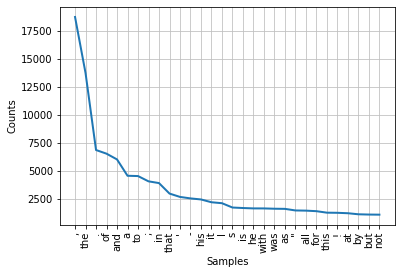

In [ ]:
fdist.plot(30)

In [ ]:
fdist['monster']

49

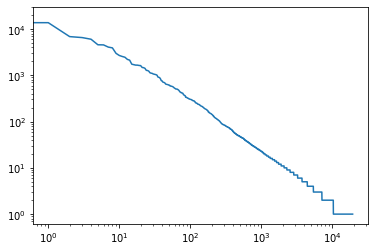

In [ ]:
a=list(fdist.values())
a=np.array(a)
a=np.sort(a)
a=a[::-1]
plt.yscale('log')
plt.xscale('log')
plt.plot(a)

## Distribuciones sobre contenido con filtro-fino

* Como vimos en la sección anterior, los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
long_words = [palabra for palabra in text1 if len(palabra)>5]
long_words[:10]

['Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Consumptive',
 'Grammar',
 'School',
 'threadbare',
 'dusting',
 'lexicons']

In [ ]:
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:20]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA',
 'ANCHORS',
 'ANIMAL',
 'ANNALS',
 'ANOTHER',
 'APOLOGY',
 'APPLICATION',
 'APPROACHING',
 'ARCTIC',
 'AROUND',
 'ASCENDING']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
palabras_interesantes[:20]

[('towing', 14),
 ('cruising', 25),
 ('others', 37),
 ('falling', 12),
 ('picture', 18),
 ('monomaniac', 11),
 ('whenever', 14),
 ('hunted', 19),
 ('matter', 86),
 ('observe', 11),
 ('follow', 18),
 ('height', 17),
 ('swallowed', 13),
 ('sleeping', 20),
 ('afloat', 12),
 ('ordinary', 19),
 ('seaman', 13),
 ('opening', 14),
 ('anything', 41),
 ('doubtless', 12)]

In [ ]:
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)
palabras_interesantes

array([(b'towing',  14), (b'cruising',  25), (b'others',  37),
       (b'falling',  12), (b'picture',  18), (b'monomaniac',  11),
       (b'whenever',  14), (b'hunted',  19), (b'matter',  86),
       (b'observe',  11), (b'follow',  18), (b'height',  17),
       (b'swallowed',  13), (b'sleeping',  20), (b'afloat',  12),
       (b'ordinary',  19), (b'seaman',  13), (b'opening',  14),
       (b'anything',  41), (b'doubtless',  12), (b'trouble',  11),
       (b'islands',  12), (b'leaves',  19), (b'chapter',  23),
       (b'somewhere',  23), (b'become',  28), (b'suddenly',  45),
       (b'concluded',  19), (b'sailor',  49), (b'purpose',  39),
       (b'pointing',  19), (b'wrinkles',  15), (b'rigging',  33),
       (b'fishermen',  28), (b'cannot',  69), (b'hunters',  28),
       (b'looking',  68), (b'madness',  16), (b'lifted',  16),
       (b'whalemen',  71), (b'roared',  13), (b'noticed',  11),
       (b'straits',  11), (b'continued',  14), (b'naturalist',  11),
       (b'around',  36), (b

In [ ]:
palabras_interesantes = np.sort(palabras_interesantes, order='frequency')
palabras_interesantes

array([(b'America',  11), (b'Father',  11), (b'Fleece',  11),
       (b'Guernsey',  11), (b'Heaven',  11), (b'NANTUCKET',  11),
       (b'Perseus',  11), (b'Ramadan',  11), (b'Therefore',  11),
       (b'additional',  11), (b'advanced',  11), (b'appearance',  11),
       (b'baleen',  11), (b'barbaric',  11), (b'beating',  11),
       (b'begins',  11), (b'beholding',  11), (b'belong',  11),
       (b'blackness',  11), (b'blanket',  11), (b'blessed',  11),
       (b'butter',  11), (b'central',  11), (b'clothes',  11),
       (b'coiled',  11), (b'commotion',  11), (b'concluding',  11),
       (b'contact',  11), (b'convenient',  11), (b'covered',  11),
       (b'cursed',  11), (b'demanded',  11), (b'desired',  11),
       (b'direct',  11), (b'element',  11), (b'elevated',  11),
       (b'elsewhere',  11), (b'excellent',  11), (b'experience',  11),
       (b'fashion',  11), (b'fashioned',  11), (b'fastened',  11),
       (b'features',  11), (b'fellows',  11), (b'fierce',  11),
       (b'fif

 Construccion de un grafico de barras customizado con Matplotlib
 
 https://matplotlib.org/3.1.1/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py

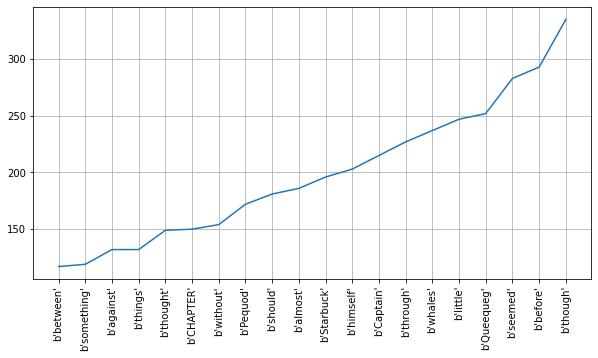

In [ ]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]

plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation = 'vertical')
plt.grid(True)
plt.show()